Predict the percentage of the student based on the number of hours the student studied. Using linear regression.

Lets import the data.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
from scipy import stats


data=pd.read_csv("../input/student-linear-study-data/student liner score and study.csv")
print(data)



    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


Check the data.

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The data looks healthy, no cleaning needed.

Let's plot our data to see any relation between the data.

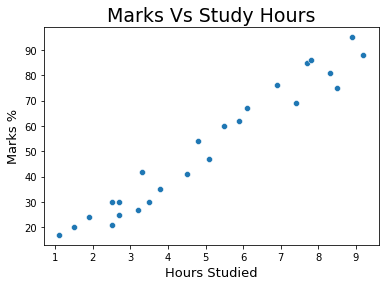

In [4]:
sns.scatterplot(y= data['Scores'], x= data['Hours'])
plt.title('Marks Vs Study Hours',size=19)
plt.ylabel('Marks %', size=13)
plt.xlabel('Hours Studied', size=13)
plt.show()

The linear relation is clearly evident.

Fit data, train and test model.

In [5]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

reg=LinearRegression()
reg.fit(x_train,y_train)
y_pred=reg.predict(x_test)

Let's compare our actual results from our predictions.

In [6]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df)

   Actual  Predicted
0      20  16.844722
1      27  33.745575
2      69  75.500624
3      30  26.786400
4      62  60.588106
5      35  39.710582
6      24  20.821393


#Let's see how our regplot will look like.


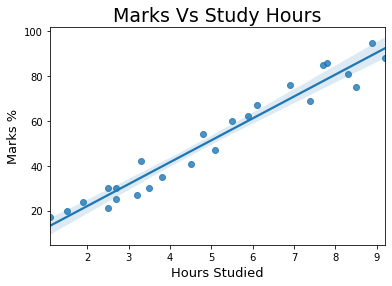

In [7]:
# From the graph a linear relation is evident
sns.regplot(x=data["Hours"], y=data["Scores"])
plt.title('Marks Vs Study Hours',size=19)
plt.ylabel('Marks %', size=13)
plt.xlabel('Hours Studied', size=13)
plt.show()

Evaluating the error for the model.

In [8]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))


Mean Absolute Error: 4.130879918502482


Now if we assume that a student studies for 9.25 hrs, how much mark will he get ?

In [9]:
hours = [9.25]
own_pred = reg.predict([[9.25]])
print("No of Hours = {}".format([hours]))
print("Predicted Score = {}".format(own_pred))

No of Hours = [[9.25]]
Predicted Score = [93.89272889]


.
